# Analytical and numerical calculation of the order of approximation of a derivative calculated through finite differences (optional).

In [1]:
from nm_lib import nm_lib as nm
import numpy as np
import matplotlib.pyplot as plt
import threading

db = np.float64
sp = np.float32

In [2]:
def h(x, float_type):
    fl = float_type
    """This is function h(x) from eq. (1)"""
    return np.cos(np.pi * (x-fl(1))/fl(2)) * np.exp(-((x-fl(3))/fl(2.5))**2)

def dh_dx(x, float_type):
    """Derivative of h(x) w.r.t. x."""
    fl = float_type
    a = np.pi/db(2)
    b = fl(2.5)
    return (np.exp(-(x - fl(3))**2/b**2) * (a * b**2* np.sin(a - a *x) - fl(2) *(x - fl(3)) *np.cos(a *(x - fl(1)))))/b**2

def get_xx_hh_dx(nump, x0, xf, float_type):
    """This function creates the array of gridpoints for x. Then solves h(x) and creates a
       delta x. And this is xx[1]-xx[0] because it is the same for all of the grid."""
    xx = np.arange(nump, dtype=float_type)/(nump-float_type(1.0)) * (xf-x0) + x0
    hh = h(xx, float_type)
    dx = np.abs(xx[1] - xx[0])
    return xx, hh, dx

def calculate_derivative(xx, hh, dx, derivative_type, float_type, **kwargs):
    """Return numerical and analytical
       ha analytic, hp numerical
    """
    dx = np.roll(xx,-1) - xx
    
    hp = derivative_type(xx, hh, **kwargs)
    ha = dh_dx(xx + dx/float_type(2), float_type)
    return hp, ha

## 1 – The numerical test of the high-order formula

Implement the finite difference formula given by the first term on the right of Eq (5) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization)  into the program you developed for Exercise 1a and test if you get an approximation to the first derivative with an error that converges to zero like $(\Delta x)^4$.

Compare the 2nd-order and 4th-order error curves. Which error do you get in either case for 128 intervals? For 512 intervals? For 1024 intervals?

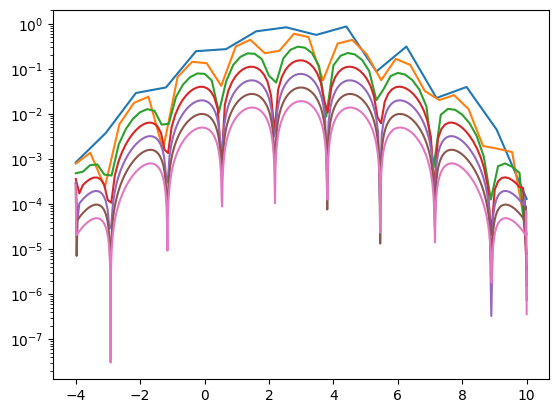

In [3]:
intervals = [2**i for i in range(4,11)]

errors_2nd = []
errors_4th = []

for ntest in intervals:
    xx, hh, dx = get_xx_hh_dx(nump=ntest, x0=db(-4.0), xf=db(10.0), float_type=db)
    
    hp, ha = calculate_derivative(xx, hh, dx, nm.deriv_cent, float_type=db, **{"ddx_order":2})
    errors_2nd.append(np.mean(np.abs(hp-ha))) 
    
    hp, ha = calculate_derivative(xx, hh, dx, nm.deriv_cent, float_type=db, **{"ddx_order":4})
    errors_4th.append(np.mean(np.abs(hp-ha))) 
    plt.semilogy(xx, np.abs(hp-ha))


<span style="color:green">JMS</span>.

<span style="color:yellow">Good. But I want to see some explanations </span>.

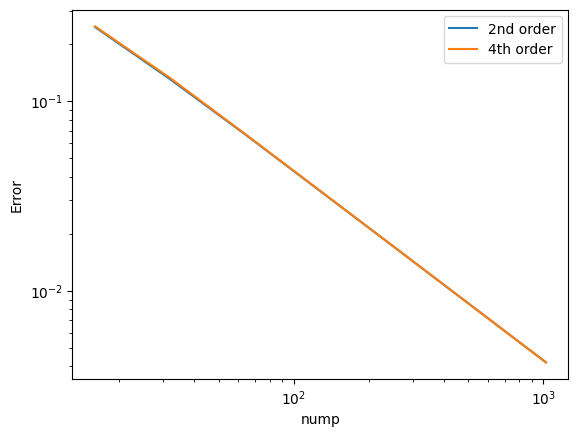

In [4]:
fig, ax = plt.subplots()
ax.loglog(intervals, errors_2nd, label="2nd order")
ax.loglog(intervals, errors_4th, label="4th order")
ax.set_xlabel("nump")
ax.set_ylabel("Error")
ax.legend()
plt.show()

In [5]:
#We go into log-space
log_error_2nd = np.log10(errors_2nd)
log_error_4th = np.log10(errors_4th)
log_interval = np.log10(intervals)
#doing the polynomial fitting to degree 1.
coefficients_2nd = np.polyfit(log_interval, log_error_2nd, 1)
coefficients_4th = np.polyfit(log_interval, log_error_4th, 1)

In [6]:
print(coefficients_2nd)
print(coefficients_4th)

[-0.98288855  0.58953635]
[-0.98595882  0.59787793]


We do a polynomial fit on the slopes of the mean squared error for the absolute value between the analytic and numerical solution for 2nd order and 4th order central derivatives. We find that the errors are linear in logspace and no difference between the two derivatives. Aslo we find the coefficient to be -1 so that this goes as $O(\Delta x)$ for both 4th and 2nd order.

<span style="color:green">JMS</span>.

<span style="color:red">explain what you have done and the results</span>.

## 2 - Precission

Try for more than $10^6$ grid points. What do you see? What happens if you try for a lower or higher floating number? Numpy uses float 64 as default. Instead, use `np.float32` and `np.float128`. Explain the error slopes. 

In [7]:
intervals2 = [2**i for i in range(5, 30)]

In [8]:
def calc_error(error_32, error_64, i):
    xx, hh, dx = get_xx_hh_dx(nump=ntest, x0=sp(-4.0), xf=sp(10.0), float_type=sp)
    hp, ha = calculate_derivative(xx, hh, dx, nm.deriv_cent, float_type=sp)
    error_32[i] = np.sum(np.abs(hp-ha))

    xx, hh, dx = get_xx_hh_dx(nump=ntest, x0=db(-4.0), xf=db(10.0), float_type=db)
    hp, ha = calculate_derivative(xx, hh, dx, nm.deriv_cent, float_type=db)
    error_64[i] = np.sum(np.abs(hp-ha))

<span style="color:green">JMS</span>.


<span style="color:orange">Minor comments: Add some minor comments in def functions, typically the description in functions are as follows</span>.

    r"""
    A sentences on what is the propose of the function.
    
    Requires
    ----------
    libraries or functions 

    Parameters
    ----------
    xx : `array`
        description and if applies what is the default values. 

    Returns
    ------- 
    t : `array`
        description 
    """

In [9]:
error_32 = np.zeros(len(intervals2))
error_64 = np.zeros(len(intervals2))

for i in range(len(intervals2)):
    calc_error(error_32, error_64, i)

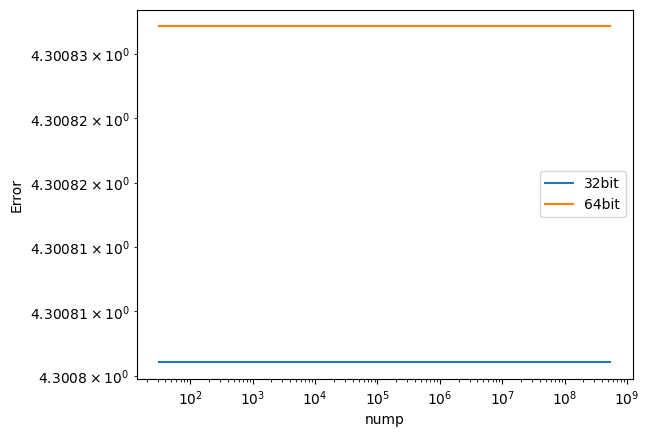

In [10]:
fig, ax = plt.subplots()
ax.loglog(intervals2, error_32, label="32bit")
ax.loglog(intervals2, error_64, label="64bit")
ax.set_xlabel("nump")
ax.set_ylabel("Error")
ax.legend()
plt.show()

We now look at the error for 32bit and 64bit floating point numbers. As we can see from the plot there is not much difference for the number of x-points we have chosen here. This is because $\Delta x$ is not low enough to make the floating point precision be an issue. If we increase nump the 32bit numbers would give floating point errors before the 64bit and this would make the numerical solution unstable.

<span style="color:green">JMS</span>.

<span style="color:red">explain what you have done and the results</span>.